### 실제 데이터의 분포를 추정해보고 검정해보자
- 실제 데이터 분포를 location scale을 통해 검증해볼수 있다
- location scale이 의미하는바를 정확하게 이해해보자
- ks.test롤 추정한 location scale이 진짜 맞는지 확인해보자

- distribution이 그 자체로 location scale임을 보이자(아직 안함)

In [1]:
source("sample2021.txt")
ls()

[1] "sample2021"

In [2]:
str(sample2021)

List of 2
 $ sample2021a: num [1:70] -0.172 0.258 -2.303 -1.934 7.236 ...
 $ sample2021b: num [1:80] 4.849 5.801 3.038 5.802 0.911 ...


In [3]:
sample2021[["sample2021a"]]

[1] -0.17245240  0.25834390 -2.30318300 -1.93432800  7.23559600  0.15324050
 [7] -2.76335200  4.07817000 -3.16892200 -0.88302360 -0.39329310 -3.84117600
[13]  0.52431790  1.79785200 -1.11046400  0.50900900  3.17723700 -3.61485600
[19] -5.37669700  4.73477500 -3.24631200 -2.00537900 -2.44591200 -3.62157500
[25]  5.89557600  3.94969300 -1.24848600 -0.49007680 -2.86413900 -1.09796600
[31] -0.79267070 -4.39362400  9.63605400 -0.18044230 -4.84232400 -1.11186400
[37] -1.10400500  2.50524700  1.71567800 -3.92027700  0.19378640  0.66936440
[43]  6.36781200 -2.24482100  0.41317000 -0.64163060 -0.72026650  1.91231900
[49] -4.13348100 -1.84403200 -3.91148600  4.43526200 -2.02520500  1.11032600
[55]  0.67836270 -3.96608400 -2.46972200  0.03367865  1.49453000 -2.81456600
[61] -4.21338400  5.02398400  0.12664370 -2.82360600  2.97819900  1.14023600
[67] -2.61797500  5.11737600 -3.03147100 -4.34240100

In [4]:
data<-sample2021[["sample2021a"]]
head(data)

[1] -0.1724524  0.2583439 -2.3031830 -1.9343280  7.2355960  0.1532405

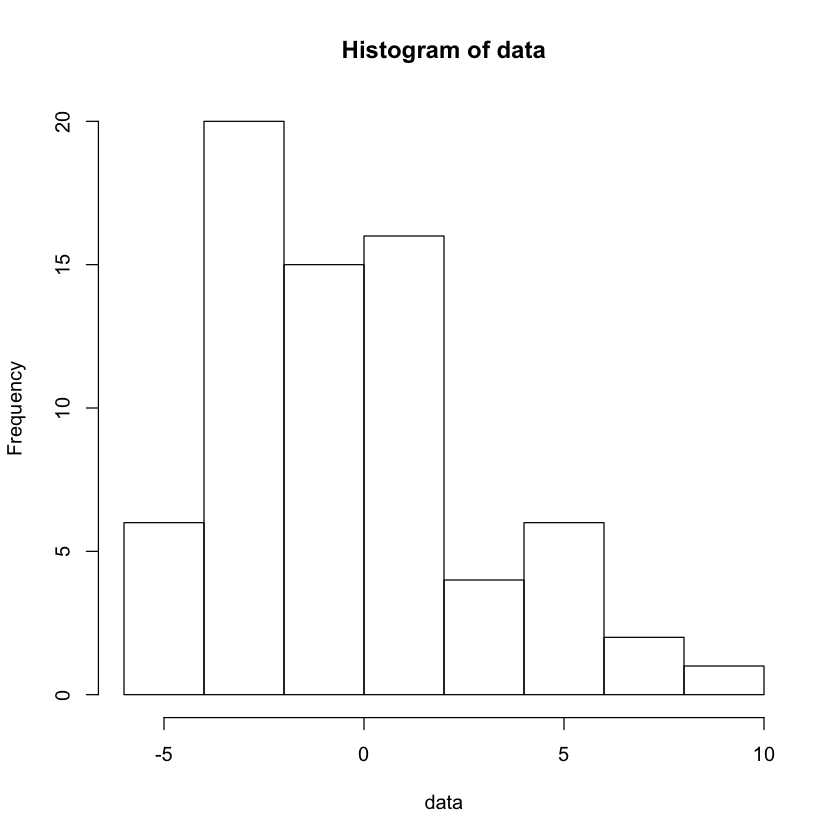

In [5]:
hist(data)

In [6]:
## qqplot을 그려보자
## 이미 만들어진걸 써올수도 있겠지만 실제로 한번 그냥 해보자

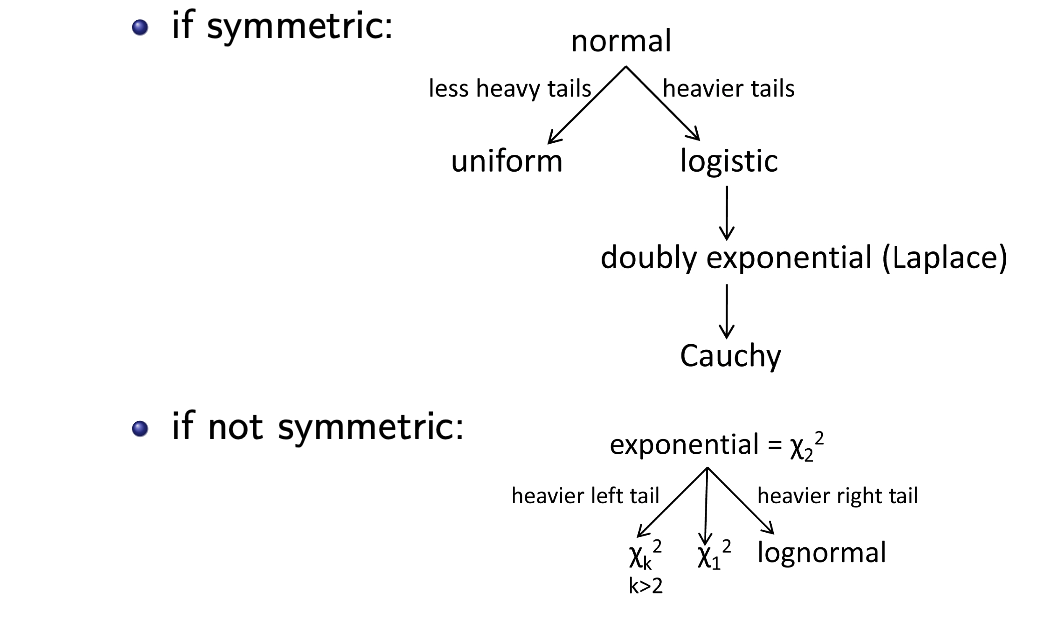

[1] -7.861077

[1] 0.7584848

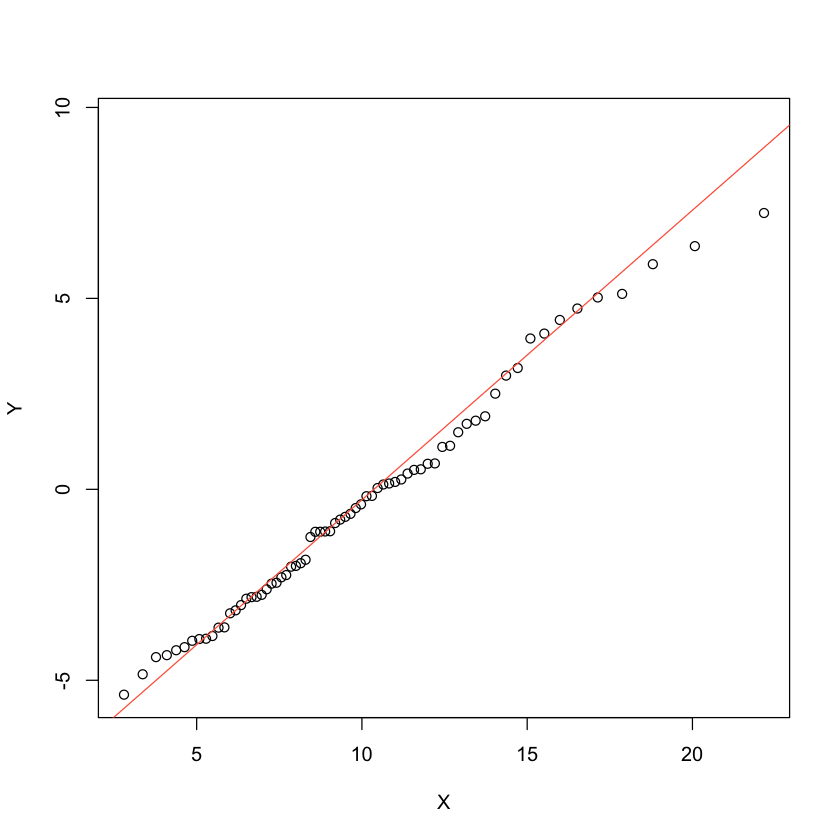

In [14]:
#위에 표를 기준으로 
# not symmetric이고 heavier left tail인거 같다
percentile<-ecdf(data)(data)
Y<-data
X<-qchisq(percentile,df=10)
X[is.infinite(X)]<-NA
b<-sd(Y)/sd(X,na.rm = T)
a<-mean(Y)-b*mean(X,na.rm = T)
a;b
plot(X,Y)
abline(a,b,col="tomato")


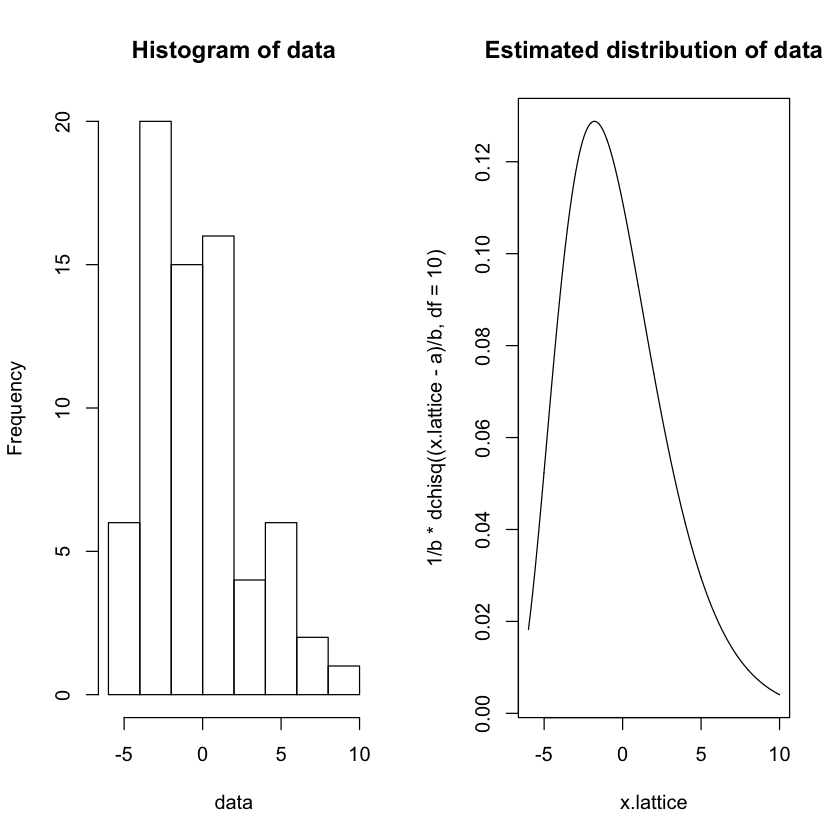

In [19]:
# 위에서 a b값이 이렇게 나왔다
a <- (-7.86107728615606) 
b <- 0.758484837464944

# 실제 분포는 => 1/b*dchisq((x-a)/b,df=10) 가 되는거다
par(mfrow=c(1,2))
hist(data)

x.lattice<-seq(-6,10,0.01)
plot(x.lattice,1/b*dchisq((x.lattice-a)/b,df=10),main="Estimated distribution of data",type="l")
# 아래 그림을 보면 상당히 그럴듯한 그림이 나온다

In [18]:
# 이제 실제로 저렇게 분포를 따르는지 검증을 해보자
# ks.test 자체가 누적분포를 이용하는거다
# H0:분포가 같다  H1: 다르다
a <- (-7.86107728615606) 
b <- 0.758484837464944

ks.test((data-a)/b,pchisq,df=10)
#결과값 pvalue = 0.8978>>>>>>>>0.05 
#fail to reject
#분포를 따른다


	One-sample Kolmogorov-Smirnov test

data:  (data - a)/b
D = 0.066304, p-value = 0.8978
alternative hypothesis: two-sided


## 분포 자체가 location scale family일 수 있다
- Ex) normal distribution is location sacle family
- Ex) exponentail distribution is scale family

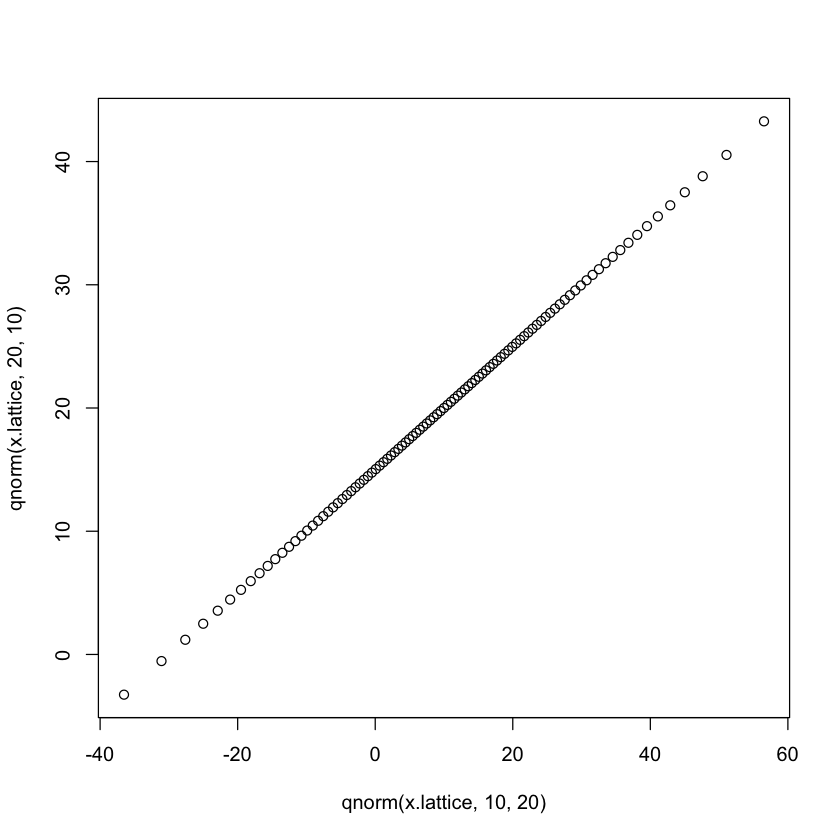

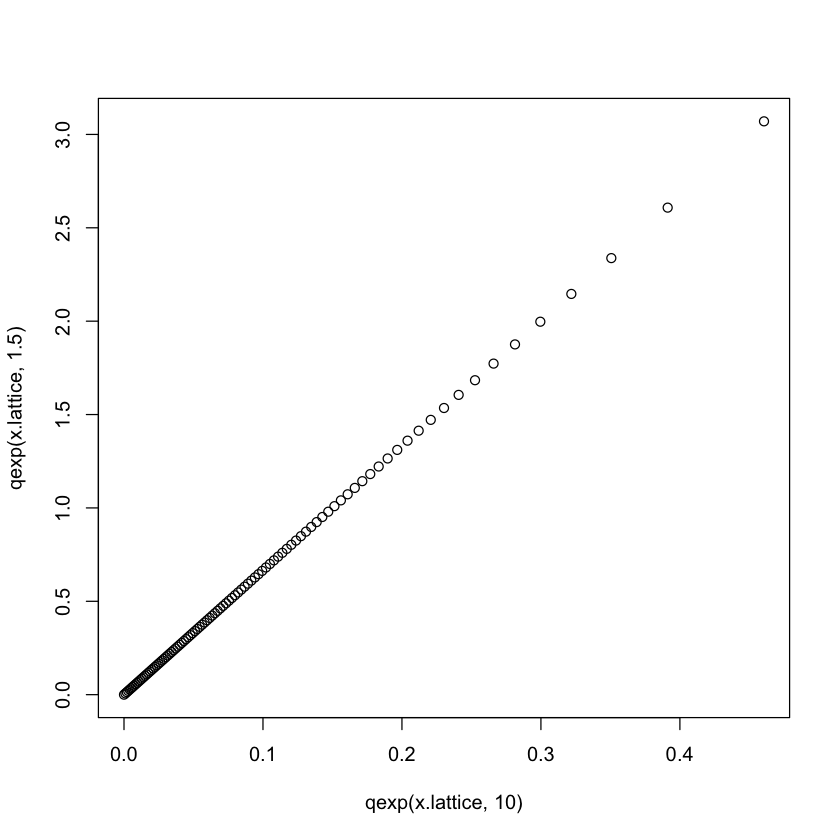

In [3]:
# normal의 parmeter가 어찌 됬든 간에 laction scale이기 때문에 직선이 나올수 밖에 없다
x.lattice<-seq(0,1,0.01)
plot(qnorm(x.lattice,10,20),qnorm(x.lattice,20,10))

# exponential도 마찬가지다
plot(qexp(x.lattice,10),qexp(x.lattice,1.5))

